In [164]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objs as go
%matplotlib inline

from keras.datasets import boston_housing

from sklearn.datasets import load_boston
boston = load_boston()
dfFeature = pd.DataFrame(boston.data, columns=boston.feature_names)
dfFeature

dfPrice = pd.DataFrame(boston.target)
dfPrice.columns =['Price']

df = pd.concat([dfFeature,dfPrice], axis=1)
df

In [36]:
pd.DataFrame(boston_housing.load_data())

,0,1
0,"[[1.23247, 0.0, 8.14, 0.0, 0.538, 6.142, 91.7,...","[15.2, 42.3, 50.0, 21.1, 17.7, 18.5, 11.3, 15...."
1,"[[18.0846, 0.0, 18.1, 0.0, 0.679, 6.434, 100.0...","[7.2, 18.8, 19.0, 27.0, 22.2, 24.5, 31.2, 22.9..."


In [37]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [38]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [39]:
len(x_train), len(x_test)

(404, 102)

In [119]:
#pd.DataFrame(x_train), 
pd.DataFrame(y_train)

,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7
...,...
399,19.4
400,25.2
401,19.4
402,19.4


In [90]:
x4 = pd.DataFrame(x_train)[5]
y = y_train

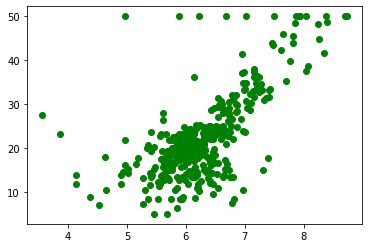

In [91]:
plt.plot(x4, y, 'o', color='green')

In [108]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import make_regression
from statsmodels.graphics.regressionplots import abline_plot
import seaborn as sns

In [96]:
from sklearn.datasets import make_regression

model = sm.OLS(pd.DataFrame(y), pd.DataFrame(x4))
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      0   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              3594.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                   6.98e-203
Time:                        21:40:39   Log-Likelihood:                         -1397.3
No. Observations:                 404   AIC:                                      2797.
Df Residuals:                     403   BIC:                                      2801.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

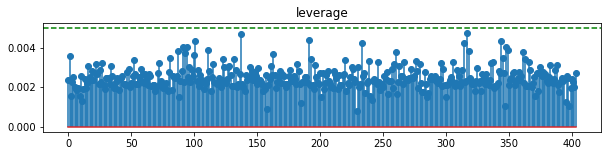

In [128]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat, use_line_collection=True)
plt.axhline(0.005, c="g", ls="--")
plt.title("leverage")
plt.show()

In [69]:
hat.sum()

0.9999999999999998

from statsmodels.graphics.regressionplots import abline_plot

ax = plt.subplot()
plt.scatter(x4, y)
#mod = sm.OLS(y,x4).fit()
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(x4[idx], y[idx], s=300, c="r", alpha=0.5)
plt.title("ols regression and leverage")
plt.show()

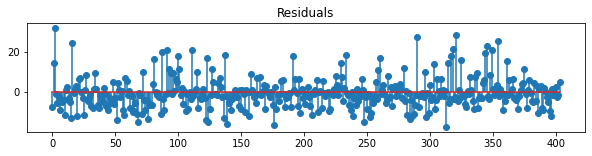

In [130]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid , use_line_collection=True)
plt.title("Residuals")
plt.show()


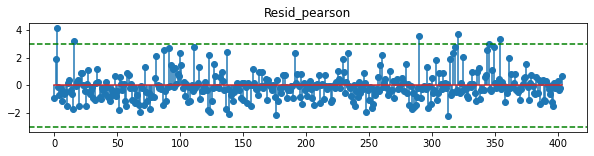

In [132]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson, use_line_collection=True)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("Resid_pearson")
plt.show()

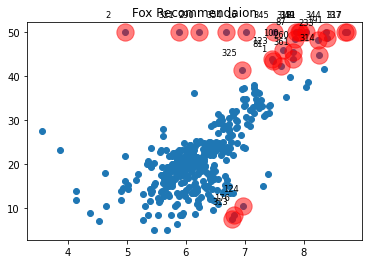

In [135]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(x4, y)
plt.scatter(x4[idx], y[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(x4[idx], y[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("Fox Recommendaion")
plt.show()

In [176]:
from sklearn.datasets import load_boston
boston = load_boston()
dfFeature = pd.DataFrame(boston.data, columns=boston.feature_names)
dfFeature

dfPrice = pd.DataFrame(boston.target)
dfPrice.columns =['Price']

df = pd.concat([dfFeature,dfPrice], axis=1)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [177]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["Price"])

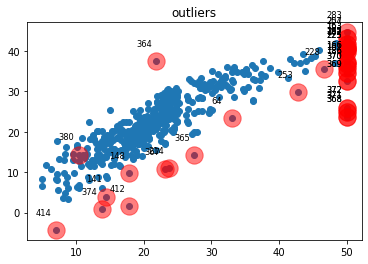

In [175]:
model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
pred = result_boston.predict(dfX)

influence_boston = result_boston.get_influence()
cooks_d2, pvals = influence_boston.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

# MEDV = 50 제거
idx = np.hstack([idx, np.where(boston.target == 50)[0]])

ax = plt.subplot()
plt.scatter(dfy, pred)
plt.scatter(dfy.Price[idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(dfy.Price[idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("outliers")
plt.show()